In [1]:
import scanpy as sc
import pandas as pd
from tqdm import tqdm

from pathlib import Path

In [2]:
data_file = './outs/adata/annotated_lvl1.h5ad'
copykat_dir = './outs/copykat/'
save_file = './outs/adata/annotated_lvl2.h5ad'

In [3]:
# load data
adata = sc.read_h5ad(data_file)
adata

AnnData object with n_obs × n_vars = 128637 × 32982
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'sample', 'leiden_lvl1_0.1', 'leiden_lvl1_0.5', 'leiden_lvl1_2.0', 'celltype_lvl1'
    var: 'ens_id', 'symbol', 'mt', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltype_lvl1_colors', 'dendrogram_celltype_lvl1', 'hvg', 'leiden_lvl1_0.1', 'leiden_lvl1_0.1_colors', 'leiden_lvl1_0.5', 'leiden_lvl1_0.5_colors', 'leiden_lvl1_2.0', 'leiden_lvl1_2.0_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts

In [4]:
copykats = []
for f in tqdm(list(Path(copykat_dir).glob('./*/*_copykat_prediction.txt'))):
    copykat = pd.read_csv(f, sep='\t', header=0, index_col=0)
    copykats.append(copykat)
# concatenate
copykat_pred = pd.concat(copykats, axis=0, join='outer')
copykat_pred

100%|██████████| 12/12 [00:00<00:00, 129.82it/s]


,copykat.pred
cell.names,
AAACATCGAAACATCGACACGACC,diploid
AAACATCGAAACATCGCCTCTATC,diploid
AAACATCGAACAACCACCGAAGTA,diploid
AAACATCGAACAACCACGCATACA,diploid
AAACATCGAACGTGATAATGTTGC,diploid
...,...
TTCACGCAGAACAGGCTCCGTCTA-1,not.defined
TTCACGCAGAATCTGACCGTGAGA,not.defined
TTCACGCAGACAGTGCCATACCAA,not.defined


In [5]:
# add to adata
adata.obs = adata.obs.join(copykat_pred, how='left')
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet,sample,leiden_lvl1_0.1,leiden_lvl1_0.5,leiden_lvl1_2.0,celltype_lvl1,copykat.pred
AAACATCGAAACATCGAATCCGTC,4094,4094,8.317522,15355.0,9.639261,29.638554,38.013676,47.294041,61.002931,2094.0,7.647309,13.637252,0.046545,False,HKWM22,0,0,0,Osteoblast,aneuploid
AAACATCGAAACATCGCGCTGATC,2225,2225,7.707962,7149.0,8.874867,43.376696,51.559659,59.602742,71.716324,786.0,6.668228,10.994545,0.026941,False,HKWM22,2,5,5,Monocyte/Macrophage,diploid
AAACATCGAAACATCGGTCTGTCA,4716,4716,8.458928,21915.0,9.994972,33.232945,42.267853,51.571983,63.878622,3547.0,8.174139,16.185261,0.075520,False,HKWM22,0,2,3,Osteoblast,aneuploid
AAACATCGAACCGAGAAAGACGGA,853,853,6.749931,1460.0,7.286877,32.260274,40.479452,54.178082,75.821918,240.0,5.484797,16.438356,0.025896,False,HKWM22,0,1,10,Osteoblast,not.defined
AAACATCGAACCGAGAACTATGCA,5343,5343,8.583730,25606.0,10.150621,28.497227,38.045771,47.348278,60.532688,2376.0,7.773594,9.279076,0.083836,False,HKWM22,0,2,3,Osteoblast,aneuploid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCACGCATCTTCACAAAGACGGA,1884,1884,7.541683,5452.0,8.603921,36.610418,45.873074,56.327953,71.533382,715.0,6.573680,13.114454,0.068913,False,WBXM16_2,2,6,20,Monocyte/Macrophage,diploid
TTCACGCATGGAACAACAAGACTA,1119,1119,7.021084,2080.0,7.640604,31.730769,40.192308,50.961538,70.240385,162.0,5.093750,7.788462,0.016783,False,WBXM16_2,2,5,7,Monocyte/Macrophage,diploid
TTCACGCATGGCTTCACCGAAGTA-1,4972,4972,8.511779,33044.0,10.405625,43.774967,51.240770,60.032078,71.870839,6096.0,8.715552,18.448130,0.013145,False,WBXM16_2,1,4,26,Osteoclast,diploid
TTCACGCATGGTGGTAAAACATCG,951,951,6.858565,2112.0,7.655864,35.700758,46.685606,59.185606,78.645833,305.0,5.723585,14.441288,0.021146,False,WBXM16_2,0,3,32,Fibroblast,aneuploid


/data1/hounaiqiao/.conda/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


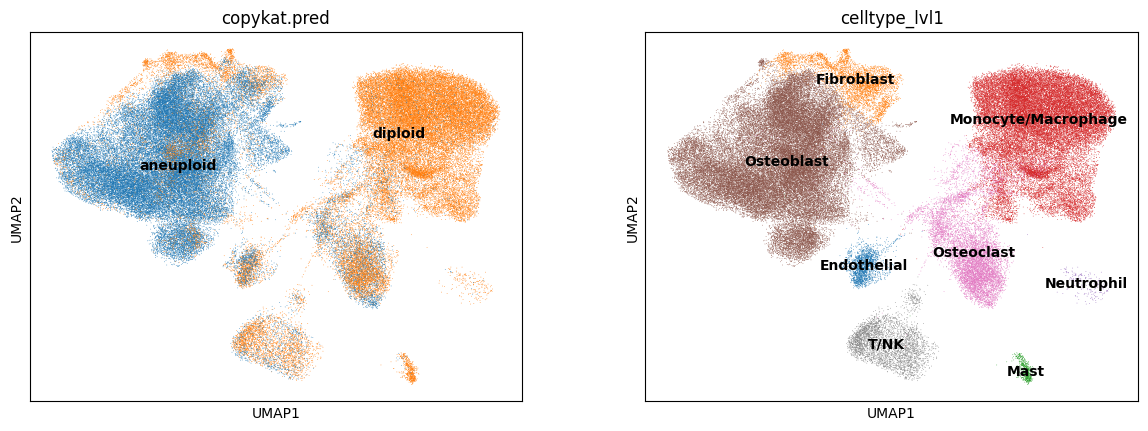

In [6]:
# visualize
sc.pl.umap(adata[adata.obs['copykat.pred'] != 'not.defined'], color=['copykat.pred', 'celltype_lvl1'], legend_loc='on data')

In [7]:
# subset
mes = adata[adata.obs['celltype_lvl1'].isin(['Osteoblast', 'Fibroblast'])]
mon = adata[adata.obs['celltype_lvl1'].isin(['Monocyte/Macrophage', 'Osteoclast'])]
lym = adata[adata.obs['celltype_lvl1'] == 'T/NK']

/data1/hounaiqiao/.conda/envs/sc/lib/python3.12/site-packages/scanpy/tools/_umap.py:181: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_uns] = dict(params=dict(a=a, b=b))


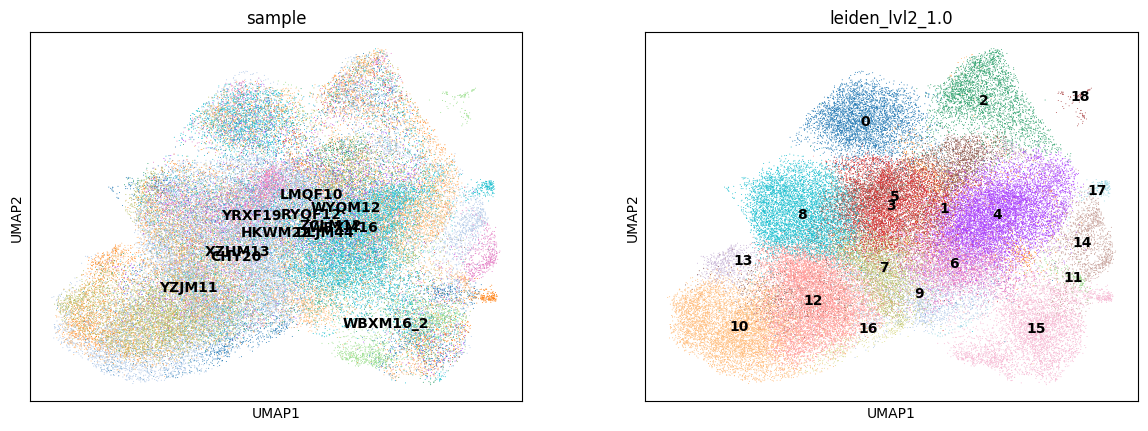

In [8]:
sc.tl.umap(mes)
sc.tl.leiden(mes, key_added='leiden_lvl2_1.0', resolution=1.0, flavor='igraph')
sc.pl.umap(mes, color=['sample', 'leiden_lvl2_1.0'], legend_loc='on data')

/data1/hounaiqiao/.conda/envs/sc/lib/python3.12/site-packages/scanpy/tools/_umap.py:181: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_uns] = dict(params=dict(a=a, b=b))


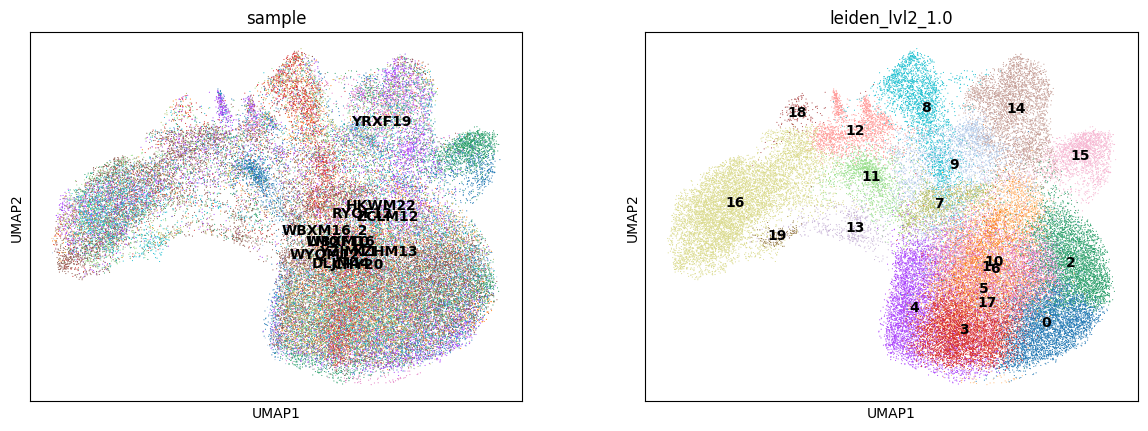

In [9]:
sc.tl.umap(mon)
sc.tl.leiden(mon, key_added='leiden_lvl2_1.0', resolution=1.0, flavor='igraph')
sc.pl.umap(mon, color=['sample', 'leiden_lvl2_1.0'], legend_loc='on data')

/data1/hounaiqiao/.conda/envs/sc/lib/python3.12/site-packages/scanpy/tools/_umap.py:181: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_uns] = dict(params=dict(a=a, b=b))


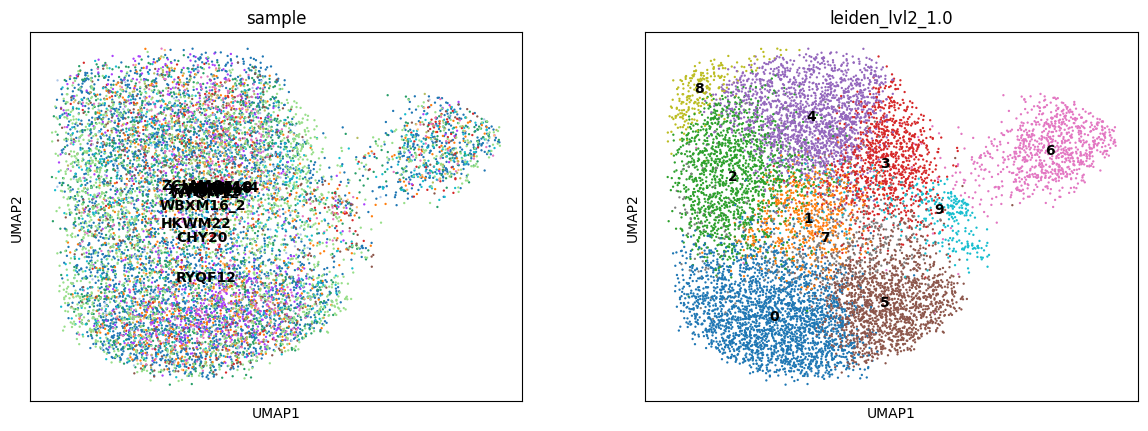

In [10]:
sc.tl.umap(lym)
sc.tl.leiden(lym, key_added='leiden_lvl2_1.0', resolution=1.0, flavor='igraph')
sc.pl.umap(lym, color=['sample', 'leiden_lvl2_1.0'], legend_loc='on data')